In [1]:
# Load libraries

library(TCGAbiolinks)
library(dplyr)
library(purrr)
library(DT)
library(SummarizedExperiment)
library(sesame)
library(sesameData)
library(janitor)
library(maftools)

# Parallel processing

library(future.apply)
plan(multisession)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPer

In [2]:
# Harmonized database examples
# DNA methylation data: Recurrent tumor samples

# query <- GDCquery(
#    project = c("TCGA-OV", "TCGA-LGG"),
#    data.category = "DNA Methylation",
#    platform = c("Illumina Human Methylation 450"),
#    sample.type = "Recurrent Tumor"
# )

# datatable(
#    getResults(query), 
#    filter = 'top',
#    options = list(scrollX = TRUE, keys = TRUE, pageLength = 5), 
#    rownames = FALSE
# )

In [3]:
# https://bioconductor.org/packages/release/bioc/vignettes/TCGAbiolinks/inst/doc/download_prepare.html
# Arguments
# GDCdownload
# GDCquery
# GDCprepare

In [4]:
# If a SummarizedExperiment object was chosen, the data can be accessed with three different accessors: 
# assay for the data information, rowRanges to gets the range of values in each row and colData to get 
# the sample information (patient, batch, sample type, etc) (Huber et al. 2015; H. J. Morgan M Obenchain V and H., n.d.). 
# An example is shown in listing below.

In [5]:
print("Download the clinical data : for all patients")

# -------------------------------------------
# Step 1: Query and download BCR Biotab clinical data
# -------------------------------------------
query <- GDCquery(
  project = "TCGA-OV", 
  data.category = "Clinical",
  data.type = "Clinical Supplement", 
  data.format = "BCR Biotab"
)

GDCdownload(query)
clinical_tab_all <- GDCprepare(query)

# -------------------------------------------
# Step 2: Explore available clinical tables
# -------------------------------------------
cat("Clinical tables available in TCGA-OV Biotab:\n")
print(names(clinical_tab_all))

# -------------------------------------------
# Step 3: Extract tables of interest
# -------------------------------------------
clinical_patient <- clinical_tab_all[["clinical_patient_ov"]]
clinical_follow_up <- clinical_tab_all[["clinical_follow_up_v1.0_ov"]]

clinical_drug <- clinical_tab_all[["clinical_drug_ov"]]

clinical_radiation <- clinical_tab_all[["clinical_radiation_ov"]]
clinical_omf <- clinical_tab_all[["clinical_omf_v4.0_ov"]]

clinical_nte <- clinical_tab_all[["clinical_nte_ov"]]
clinical_follow_up2 <- clinical_tab_all[["clinical_follow_up_v1.0_ov"]]

# Clinical tables available in TCGA-OV Biotab:
# [1] * "clinical_patient_ov"            * "clinical_nte_ov"               
# [3] * "clinical_drug_ov"               * "clinical_follow_up_v1.0_ov"    
# [5] * "clinical_follow_up_v1.0_nte_ov" * "clinical_radiation_ov"         
# [7] * "clinical_omf_v4.0_ov"    

[1] "Download the clinical data : for all patients"


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By data.format

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 7 files for download 7 already exist.

All samples have been already downloaded



  |======================================================================| 100%
Clinical tables available in TCGA-OV Biotab:
[1] "clinical_patient_ov"            "clinical_nte_ov"               
[3] "clinical_drug_ov"               "clinical_follow_up_v1.0_ov"    
[5] "clinical_follow_up_v1.0_nte_ov" "clinical_radiation_ov"         
[7] "clinical_omf_v4.0_ov"          


In [6]:
list.files()

[1] "age_distribution.png"                                                  
 [2] "age_group_distribution.png"                                            
 [3] "boxplot_PI4K2B_ENSG00000038210_14.png"                                 
 [4] "boxplot_PPP4R2_ENSG00000163605_15.png"                                 
 [5] "check_barcodes.r"                                                      
 [6] "check_columns.r"                                                       
 [7] "check_data_structure.r"                                                
 [8] "check_gene_ids.r"                                                      
 [9] "check_genes_final.r"                                                   
[10] "check_versions.r"                                                      
[11] "comprehensive_survival_analysis_fixed.r"                               
[12] "debug_structure.r"                                                     
[13] "explore_tcga_ov_clinical.r"                                            
[14] "expression_analysis.r"                                                 
[15] "extract_base_ids_fixed.r"                                              
[16] "extract_base_ids.r"                                                    
[17] "extract_cisplatin_data.r"                                              
[18] "extract_cisplatin_specific_fixed_v2.r"                                 
[19] "extract_cisplatin_specific_fixed.r"                                    
[20] "extract_cisplatin_specific.r"                                          
[21] "final_gene_check.r"                                                    
[22] "fix_duplicate_columns_simple.r"                                        
[23] "fix_rownames_check.r"                                                  
[24] "fixed_survival_analysis.r"                                             
[25] "GDCdata"                                                               
[26] "gender_distribution.png"                                               
[27] "histogram_PI4K2B_ENSG00000038210_14.png"                               
[28] "histogram_PPP4R2_ENSG00000163605_15.png"                               
[29] "improved_survival_analysis.r"                                          
[30] "MANIFEST.txt"                                                          
[31] "nationwidechildrens.org_clinical_drug_ov.Cisplatin.txt"                
[32] "nationwidechildrens.org_clinical_drug_ov.txt"                          
[33] "nationwidechildrens.org_clinical_follow_up_v1.0_nte_ov.txt"            
[34] "nationwidechildrens.org_clinical_follow_up_v1.0_ov.txt"                
[35] "nationwidechildrens.org_clinical_nte_ov.txt"                           
[36] "nationwidechildrens.org_clinical_omf_v4.0_ov.txt"                      
[37] "nationwidechildrens.org_clinical_patient_ov.txt"                       
[38] "nationwidechildrens.org_clinical_radiation_ov.txt"                     
[39] "OV_se.rds"                                                             
[40] "plot_specific_genes_fixed.r"                                           
[41] "plot_specific_genes_robust.r"                                          
[42] "plot_specific_genes.r"                                                 
[43] "quick_check.r"                                                         
[44] "quick_survival.r"                                                      
[45] "quick_view_tcga_ov.r"                                                  
[46] "real_survival_analysis.r"                                              
[47] "simple_check.r"                                                        
[48] "simple_final_check.r"                                                  
[49] "simple_gene_check.r"                                                   
[50] "simple_survival_analysis.r"                                            
[51] "standalone_survival.r"                                                 
[52] "string_match_chec

In [7]:

# ============================================================================
# STEP 2: Explore Available Tables
# ============================================================================

print("Available clinical tables in TCGA-OV:")
print(names(clinical_tab_all))

# ============================================================================
# STEP 3: Extract and View Each Table
# ============================================================================

# Extract each table
clinical_patient <- clinical_tab_all[["clinical_patient_ov"]]
clinical_nte <- clinical_tab_all[["clinical_nte_ov"]]
clinical_drug <- clinical_tab_all[["clinical_drug_ov"]]
clinical_follow_up <- clinical_tab_all[["clinical_follow_up_v1.0_ov"]]
clinical_follow_up_nte <- clinical_tab_all[["clinical_follow_up_v1.0_nte_ov"]]
clinical_radiation <- clinical_tab_all[["clinical_radiation_ov"]]
clinical_omf <- clinical_tab_all[["clinical_omf_v4.0_ov"]]

# ============================================================================
# STEP 4: Display Table Information
# ============================================================================

# Function to display table summary
display_table_info <- function(table_name, data) {
  cat("\n", "=", 60, "\n")
  cat("TABLE:", table_name, "\n")
  cat("=", 60, "\n")
  cat("Dimensions:", dim(data), "\n")
  cat("Number of rows:", nrow(data), "\n")
  cat("Number of columns:", ncol(data), "\n")
  cat("\nColumn names:\n")
  print(colnames(data))
  cat("\nFirst few rows:\n")
  print(head(data, 3))
  cat("\nData types:\n")
  print(sapply(data, class))
  cat("\n", "=", 60, "\n")
}

[1] "Available clinical tables in TCGA-OV:"
[1] "clinical_patient_ov"            "clinical_nte_ov"               
[3] "clinical_drug_ov"               "clinical_follow_up_v1.0_ov"    
[5] "clinical_follow_up_v1.0_nte_ov" "clinical_radiation_ov"         
[7] "clinical_omf_v4.0_ov"          


In [8]:
# Display information for each table
display_table_info("clinical_patient_ov", clinical_patient)


 = 60 
TABLE: clinical_patient_ov 
= 60 
Dimensions: 589 57 
Number of rows: 589 
Number of columns: 57 

Column names:
 [1] "bcr_patient_uuid"                    
 [2] "bcr_patient_barcode"                 
 [3] "form_completion_date"                
 [4] "prospective_collection"              
 [5] "retrospective_collection"            
 [6] "gender"                              
 [7] "birth_days_to"                       
 [8] "race"                                
 [9] "ethnicity"                           
[10] "jewish_religion_heritage_indicator"  
[11] "history_other_malignancy"            
[12] "history_neoadjuvant_treatment"       
[13] "initial_pathologic_dx_year"          
[14] "method_initial_path_dx"              
[15] "method_initial_path_dx_other"        
[16] "vital_status"                        
[17] "last_contact_days_to"                
[18] "death_days_to"                       
[19] "tumor_status"                        
[20] "tumor_grade"                         

In [9]:
# Display information for each table
display_table_info("clinical_nte_ov", clinical_nte)


 = 60 
TABLE: clinical_nte_ov 
= 60 
Dimensions: 10 10 
Number of rows: 10 
Number of columns: 10 

Column names:
 [1] "bcr_patient_uuid"                                    
 [2] "bcr_patient_barcode"                                 
 [3] "new_tumor_event_dx_days_to"                          
 [4] "new_tumor_event_dx_evidence"                         
 [5] "new_tumor_event_dx_method_other"                     
 [6] "new_tumor_event_radiation_tx"                        
 [7] "additional_pharmaceutical_therapy"                   
 [8] "days_to_new_tumor_event_additional_surgery_procedure"
 [9] "new_neoplasm_event_type"                             
[10] "new_tumor_event_additional_surgery_procedure"        

First few rows:
# A tibble: 3 × 10
  bcr_patient_uuid                    bcr_patient_barcode new_tumor_event_dx_d…¹
  <chr>                               <chr>               <chr>                 
1 bcr_patient_uuid                    bcr_patient_barcode days_to_new_tumor_eve…
2 CDE_

In [10]:
# Display information for each table
display_table_info("clinical_drug_ov", clinical_drug)


 = 60 
TABLE: clinical_drug_ov 
= 60 
Dimensions: 2518 28 
Number of rows: 2518 
Number of columns: 28 

Column names:
 [1] "bcr_patient_uuid"                    "bcr_patient_barcode"                
 [3] "bcr_drug_barcode"                    "bcr_drug_uuid"                      
 [5] "form_completion_date"                "pharmaceutical_therapy_drug_name"   
 [7] "clinical_trial_drug_classification"  "pharmaceutical_therapy_type"        
 [9] "pharmaceutical_tx_started_days_to"   "pharmaceutical_tx_ongoing_indicator"
[11] "pharmaceutical_tx_ended_days_to"     "treatment_best_response"            
[13] "days_to_stem_cell_transplantation"   "pharm_regimen"                      
[15] "pharm_regimen_other"                 "pharma_adjuvant_cycles_count"       
[17] "pharma_type_other"                   "pharmaceutical_tx_dose_units"       
[19] "pharmaceutical_tx_total_dose_units"  "prescribed_dose"                    
[21] "regimen_number"                      "route_of_administration"  

In [11]:
# Display information for each table
display_table_info("clinical_follow_up_v1.0_ov", clinical_follow_up)


 = 60 
TABLE: clinical_follow_up_v1.0_ov 
= 60 
Dimensions: 672 19 
Number of rows: 672 
Number of columns: 19 

Column names:
 [1] "bcr_patient_uuid"                   "bcr_patient_barcode"               
 [3] "bcr_followup_barcode"               "bcr_followup_uuid"                 
 [5] "form_completion_date"               "followup_reason"                   
 [7] "followup_lost_to"                   "radiation_treatment_adjuvant"      
 [9] "pharmaceutical_tx_adjuvant"         "treatment_outcome_first_course"    
[11] "vital_status"                       "last_contact_days_to"              
[13] "death_days_to"                      "tumor_status"                      
[15] "new_tumor_event_dx_indicator"       "treatment_outcome_at_tcga_followup"
[17] "ecog_score"                         "karnofsky_score"                   
[19] "performance_status_timing"         

First few rows:
# A tibble: 3 × 19
  bcr_patient_uuid    bcr_patient_barcode bcr_followup_barcode bcr_followup_uuid
  

In [12]:
# Display information for each table
display_table_info("clinical_follow_up_v1.0_nte_ov", clinical_follow_up_nte)


 = 60 
TABLE: clinical_follow_up_v1.0_nte_ov 
= 60 
Dimensions: 515 11 
Number of rows: 515 
Number of columns: 11 

Column names:
 [1] "bcr_patient_uuid"                                    
 [2] "bcr_patient_barcode"                                 
 [3] "bcr_followup_barcode"                                
 [4] "new_tumor_event_dx_days_to"                          
 [5] "new_tumor_event_dx_evidence"                         
 [6] "new_tumor_event_dx_method_other"                     
 [7] "new_tumor_event_radiation_tx"                        
 [8] "additional_pharmaceutical_therapy"                   
 [9] "days_to_new_tumor_event_additional_surgery_procedure"
[10] "new_neoplasm_event_type"                             
[11] "new_tumor_event_additional_surgery_procedure"        

First few rows:
# A tibble: 3 × 11
  bcr_patient_uuid                     bcr_patient_barcode bcr_followup_barcode
  <chr>                                <chr>               <chr>               
1 bcr_patien

In [13]:
# Display information for each table
display_table_info("clinical_radiation_ov", clinical_radiation)


 = 60 
TABLE: clinical_radiation_ov 
= 60 
Dimensions: 38 18 
Number of rows: 38 
Number of columns: 18 

Column names:
 [1] "bcr_patient_uuid"                    "bcr_patient_barcode"                
 [3] "bcr_radiation_barcode"               "bcr_radiation_uuid"                 
 [5] "form_completion_date"                "radiation_therapy_type"             
 [7] "radiation_therapy_site"              "radiation_total_dose"               
 [9] "radiation_adjuvant_units"            "radiation_adjuvant_fractions_total" 
[11] "radiation_therapy_ongoing_indicator" "course_number"                      
[13] "days_to_radiation_therapy_end"       "days_to_radiation_therapy_start"    
[15] "measure_of_response"                 "radiation_type_other"               
[17] "therapy_regimen"                     "therapy_regimen_other"              

First few rows:
# A tibble: 3 × 18
  bcr_patient_uuid  bcr_patient_barcode bcr_radiation_barcode bcr_radiation_uuid
  <chr>             <chr>        

In [14]:
# Display information for each table
display_table_info("clinical_omf_v4.0_ov", clinical_omf)


 = 60 
TABLE: clinical_omf_v4.0_ov 
= 60 
Dimensions: 5 30 
Number of rows: 5 
Number of columns: 30 

Column names:
 [1] "bcr_patient_uuid"                       
 [2] "bcr_patient_barcode"                    
 [3] "bcr_omf_barcode"                        
 [4] "bcr_omf_uuid"                           
 [5] "form_completion_date"                   
 [6] "malignancy_type"                        
 [7] "other_malignancy_dx_days_to"            
 [8] "surgery_indicator"                      
 [9] "other_malignancy_surgery_type"          
[10] "other_malignancy_surgery_days_to"       
[11] "pharmaceutical_therapy_indicator"       
[12] "pharmaceutical_therapy_extent"          
[13] "pharmaceutical_therapy_drug_name"       
[14] "pharmaceutical_tx_started_days_to"      
[15] "radiation_therapy_indicator"            
[16] "radiation_therapy_extent"               
[17] "history_rt_tx_to_site_of_tcga_tumor"    
[18] "radiation_therapy_started_days_to"      
[19] "ajcc_staging_edition"         

In [15]:
# Check if the column exists
if ('pharmaceutical_therapy_drug_name' %in% colnames(clinical_drug)) {
  cat('Unique drug names in pharmaceutical_therapy_drug_name column:\n')
  unique_drugs <- unique(clinical_drug$pharmaceutical_therapy_drug_name)
  unique_drugs <- unique_drugs[!is.na(unique_drugs) & unique_drugs != '']
  print(sort(unique_drugs))
  cat('\nTotal unique drugs:', length(unique_drugs), '\n')
} else {
  cat('Column pharmaceutical_therapy_drug_name not found.\n')
  cat('Available columns:\n')
  print(colnames(clinical_drug))
}

Unique drug names in pharmaceutical_therapy_drug_name column:
  [1] "[Not Available]"                  "5F4 Leucovorin"                  
  [3] "90Y-HU3S193"                      "A202171 Protocol"                
  [5] "Abagovomab or Placebo"            "Abagovomab vs Placebo"           
  [7] "Abagovomag vs Placebo"            "Abraxane"                        
  [9] "Adriamycin"                       "Alimta"                          
 [11] "Altima"                           "AMG 706"                         
 [13] "Amgen 706"                        "Aminopterin"                     
 [15] "Amitostin"                        "Amitostine"                      
 [17] "Arimidex"                         "Armidex"                         
 [19] "Aromasin"                         "Avastin"                         
 [21] "Avastin (Bevacizumab)"            "Avastin/bevacizumab/placebo"     
 [23] "AZD 2281"                         "BA4 43 9006"                     
 [25] "Bevacizamab/Placebo

In [16]:
# Extract Cisplatin Data from TCGA-OV Clinical Drug Data
# Fixed version to handle data structure issues

library(TCGAbiolinks)
library(dplyr)

# ============================================================================
# STEP 1: Download and Prepare Clinical Drug Data
# ============================================================================

print("Downloading TCGA-OV clinical data...")

# Query TCGA-OV clinical data
query <- GDCquery(
  project = "TCGA-OV", 
  data.category = "Clinical",
  data.type = "Clinical Supplement", 
  data.format = "BCR Biotab"
)

# Download the data
GDCdownload(query)

# Prepare the data
clinical_tab_all <- GDCprepare(query)

# Extract drug data and ensure it's a data frame
clinical_drug <- clinical_tab_all[["clinical_drug_ov"]]

# Check data structure
cat("Data structure check:\n")
cat("Class of clinical_drug:", class(clinical_drug), "\n")
cat("Dimensions:", dim(clinical_drug), "\n")

# Convert to data frame if it's a list
if (is.list(clinical_drug) && !is.data.frame(clinical_drug)) {
  print("Converting list to data frame...")
  clinical_drug <- as.data.frame(clinical_drug, stringsAsFactors = FALSE)
}

# Check columns
cat("Available columns:\n")
print(colnames(clinical_drug))

# ============================================================================
# STEP 2: Extract Cisplatin Data from pharmaceutical_therapy_drug_name
# ============================================================================

print("Extracting cisplatin data from pharmaceutical_therapy_drug_name column...")

# Check if the column exists
if (!"pharmaceutical_therapy_drug_name" %in% colnames(clinical_drug)) {
  cat("Column 'pharmaceutical_therapy_drug_name' not found!\n")
  cat("Available columns:\n")
  print(colnames(clinical_drug))
  stop("Please check the correct column name")
}

# Extract rows where pharmaceutical_therapy_drug_name contains "cisplatin"
cisplatin_data <- clinical_drug %>%
  filter(grepl("cisplatin", pharmaceutical_therapy_drug_name, ignore.case = TRUE))

# Ensure cisplatin_data is a data frame
if (is.list(cisplatin_data) && !is.data.frame(cisplatin_data)) {
  cisplatin_data <- as.data.frame(cisplatin_data, stringsAsFactors = FALSE)
}

# ============================================================================
# STEP 3: Display Results
# ============================================================================

cat("\n", "=", 60, "\n")
cat("CISPLATIN TREATMENT DATA\n")
cat("=", 60, "\n")
cat("Total rows found:", nrow(cisplatin_data), "\n")
cat("Column used: pharmaceutical_therapy_drug_name\n")
cat("Data class:", class(cisplatin_data), "\n")
cat("=", 60, "\n")

# Display all columns
print("All columns in cisplatin data:")
print(colnames(cisplatin_data))

cat("\n", "=", 60, "\n")
cat("CISPLATIN DATA PREVIEW\n")
cat("=", 60, "\n")

# Show first few rows
print(head(cisplatin_data, 5))

# Show all unique drug names found (to see variations)
cat("\n", "=", 60, "\n")
cat("UNIQUE DRUG NAMES CONTAINING 'CISPLATIN'\n")
cat("=", 60, "\n")
unique_cisplatin_names <- unique(cisplatin_data$pharmaceutical_therapy_drug_name)
print(sort(unique_cisplatin_names))

# ============================================================================
# STEP 4: Summary Statistics
# ============================================================================

cat("\n", "=", 60, "\n")
cat("SUMMARY OF KEY VARIABLES\n")
cat("=", 60, "\n")

# Patient count
if ("bcr_patient_barcode" %in% colnames(cisplatin_data)) {
  unique_patients <- unique(cisplatin_data$bcr_patient_barcode)
  cat("Unique patients treated with cisplatin:", length(unique_patients), "\n")
  
  # Show unique patients
  cat("\nUnique patient barcodes:\n")
  print(unique_patients)
} else {
  cat("Column 'bcr_patient_barcode' not found in cisplatin data\n")
}

# Show summary of other key variables
if ("pharmaceutical_therapy_type" %in% colnames(cisplatin_data)) {
  cat("\nTherapy types:\n")
  print(table(cisplatin_data$pharmaceutical_therapy_type))
}

if ("pharmaceutical_therapy_dosage" %in% colnames(cisplatin_data)) {
  cat("\nDosage summary:\n")
  print(summary(cisplatin_data$pharmaceutical_therapy_dosage))
}

if ("pharmaceutical_therapy_duration" %in% colnames(cisplatin_data)) {
  cat("\nDuration summary:\n")
  print(summary(cisplatin_data$pharmaceutical_therapy_duration))
}

# ============================================================================
# STEP 5: Treatments per Patient Analysis
# ============================================================================

cat("\n", "=", 60, "\n")
cat("TREATMENTS PER PATIENT\n")
cat("=", 60, "\n")

# Count cisplatin treatments per patient (with error handling)
if ("bcr_patient_barcode" %in% colnames(cisplatin_data)) {
  tryCatch({
    treatments_per_patient <- cisplatin_data %>%
      count(bcr_patient_barcode, sort = TRUE)
    
    cat("Cisplatin treatments per patient:\n")
    print(treatments_per_patient)
    
    # Show patients with multiple cisplatin treatments
    multiple_treatments <- treatments_per_patient %>%
      filter(n > 1)
    
    if (nrow(multiple_treatments) > 0) {
      cat("\nPatients with multiple cisplatin treatments:\n")
      print(multiple_treatments)
      
      cat("\nDetailed data for patients with multiple treatments:\n")
      for (patient in multiple_treatments$bcr_patient_barcode) {
        cat("\nPatient:", patient, "\n")
        patient_data <- cisplatin_data %>%
          filter(bcr_patient_barcode == patient)
        print(patient_data)
      }
    }
  }, error = function(e) {
    cat("Error in treatments per patient analysis:", e$message, "\n")
    cat("Trying alternative approach...\n")
    
    # Alternative approach using base R
    patient_counts <- table(cisplatin_data$bcr_patient_barcode)
    cat("Cisplatin treatments per patient (base R):\n")
    print(patient_counts)
  })
} else {
  cat("Cannot analyze treatments per patient - bcr_patient_barcode column not found\n")
}

# ============================================================================
# STEP 6: Save Results
# ============================================================================

# Save to CSV
tryCatch({
  write.csv(cisplatin_data, "tcga_ov_cisplatin_treatment_data.csv", row.names = FALSE)
  
  cat("\n", "=", 60, "\n")
  cat("DATA SAVED\n")
  cat("=", 60, "\n")
  cat("Cisplatin data saved to: tcga_ov_cisplatin_treatment_data.csv\n")
  cat("=", 60, "\n")
}, error = function(e) {
  cat("Error saving data:", e$message, "\n")
})

# ============================================================================
# STEP 7: Additional Analysis
# ============================================================================

cat("\n", "=", 60, "\n")
cat("ADDITIONAL ANALYSIS\n")
cat("=", 60, "\n")

# Show combination therapies (if cisplatin is combined with other drugs)
cat("Drug combinations with cisplatin:\n")
for (i in 1:min(nrow(cisplatin_data), 10)) {  # Limit to first 10 for display
  drug_name <- cisplatin_data$pharmaceutical_therapy_drug_name[i]
  if ("bcr_patient_barcode" %in% colnames(cisplatin_data)) {
    patient <- cisplatin_data$bcr_patient_barcode[i]
    cat("Patient:", patient, "- Drug:", drug_name, "\n")
  } else {
    cat("Row", i, "- Drug:", drug_name, "\n")
  }
}

# Show therapy timing if available
if ("pharmaceutical_therapy_start_date" %in% colnames(cisplatin_data)) {
  cat("\nTherapy start dates:\n")
  print(table(cisplatin_data$pharmaceutical_therapy_start_date))
}

if ("pharmaceutical_therapy_end_date" %in% colnames(cisplatin_data)) {
  cat("\nTherapy end dates:\n")
  print(table(cisplatin_data$pharmaceutical_therapy_end_date))
}

# ============================================================================
# STEP 8: Data Structure Summary
# ============================================================================

cat("\n", "=", 60, "\n")
cat("DATA STRUCTURE SUMMARY\n")
cat("=", 60, "\n")
cat("Original clinical_drug class:", class(clinical_tab_all[["clinical_drug_ov"]]), "\n")
cat("Processed clinical_drug class:", class(clinical_drug), "\n")
cat("Cisplatin data class:", class(cisplatin_data), "\n")
cat("Cisplatin data dimensions:", dim(cisplatin_data), "\n")

print("Cisplatin data extraction completed!") 

[1] "Downloading TCGA-OV clinical data..."


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By data.format

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 7 files for download 7 already exist.

All samples have been already downloaded



  |======================================================================| 100%
Data structure check:
Class of clinical_drug: spec_tbl_df tbl_df tbl data.frame 
Dimensions: 2518 28 
Available columns:
 [1] "bcr_patient_uuid"                    "bcr_patient_barcode"                
 [3] "bcr_drug_barcode"                    "bcr_drug_uuid"                      
 [5] "form_completion_date"                "pharmaceutical_therapy_drug_name"   
 [7] "clinical_trial_drug_classification"  "pharmaceutical_therapy_type"        
 [9] "pharmaceutical_tx_started_days_to"   "pharmaceutical_tx_ongoing_indicator"
[11] "pharmaceutical_tx_ended_days_to"     "treatment_best_response"            
[13] "days_to_stem_cell_transplantation"   "pharm_regimen"                      
[15] "pharm_regimen_other"                 "pharma_adjuvant_cycles_count"       
[17] "pharma_type_other"                   "pharmaceutical_tx_dose_units"       
[19] "pharmaceutical_tx_total_dose_units"  "prescribed_dose"          

In [17]:
query <- GDCquery(
    project = "TCGA-OV", 
    data.category = "Sequencing Reads",
    data.type = "Aligned Reads", 
    data.format = "bam",
    workflow.type = "STAR 2-Pass Chimeric"
)
# Only first 10 to make render faster
datatable(
    getResults(query, rows = 1:10,cols = c("file_name","cases")), 
    filter = 'top',
    options = list(scrollX = TRUE, keys = TRUE, pageLength = 5), 
    rownames = FALSE
)

# getManifest(query, save = FALSE) 

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By data.format

ooo By data.type

ooo By workflow.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



HTML widgets cannot be represented in plain text (need html)

In [18]:
print("Download ATAC files")

[1] "Download ATAC files"


In [19]:
# Query ATAC-seq metadata
atac_query <- TCGAbiolinks:::GDCquery_ATAC_seq()

# Extract results and select desired columns
atac_results <- getResults(atac_query)[, c("file_name", "file_size")]

# Display as an interactive datatable
datatable(
  atac_results,
  filter = 'top',
  options = list(scrollX = TRUE, keys = TRUE, pageLength = 5),
  rownames = FALSE
)

# https://rpubs.com/tiagochst/atac_seq_workshop

# query <- TCGAbiolinks:::GDCquery_ATAC_seq(file.type = "rds") 
# GDCdownload(query, method = "client")

# query <- TCGAbiolinks:::GDCquery_ATAC_seq(file.type = "bigWigs") 
# GDCdownload(query, method = "client")

Rows: 47 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): id, filename, md5
dbl (1): size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


HTML widgets cannot be represented in plain text (need html)

In [20]:
# Samples with DNA methylation and gene expression data
# We will access the harmonized database and search for all patients with DNA methylation (platform HumanMethylation450k) 
# and gene expression data for Colon Adenocarcinoma tumor (TCGA-COAD).

In [21]:
print("Download Methylation and Gene Expression files")

[1] "Download Methylation and Gene Expression files"


In [22]:
query_met <- GDCquery(
  project = "TCGA-OV",
  data.category = "DNA Methylation",
  data.type = "Methylation Beta Value",        
  platform = "Illumina Human Methylation 450"
)

query_exp <- GDCquery(
    project = "TCGA-OV",
    data.category = "Transcriptome Profiling",
    data.type = "Gene Expression Quantification", 
    workflow.type = "STAR - Counts"
)

# Get all patients that have DNA methylation and gene expression.
common.patients <- intersect(
    substr(getResults(query_met, cols = "cases"), 1, 12),
    substr(getResults(query_exp, cols = "cases"), 1, 12)
)

# print(common.patients)

# Only seelct the first 5 patients
# query_met <- GDCquery(
#    project = "TCGA-COAD",
#    data.category = "DNA Methylation",
#    platform = c("Illumina Human Methylation 450"),
#    barcode = common.patients[1:5]
# )

# query_exp <- GDCquery(
#    project = "TCGA-COAD",
#    data.category = "Transcriptome Profiling",
#    data.type = "Gene Expression Quantification", 
#    workflow.type = "STAR - Counts",
#    barcode = common.patients[1:5]
# )

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By platform

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By data.

In [23]:
# Extract barcodes and identify common patients
all_met_barcodes <- getResults(query_met, cols = "cases")
all_exp_barcodes <- getResults(query_exp, cols = "cases")

all_met_patients <- substr(all_met_barcodes, 1, 12)
all_exp_patients <- substr(all_exp_barcodes, 1, 12)

common_patients <- intersect(all_met_patients, all_exp_patients)
print(common_patients)

[1] "TCGA-WR-A838" "TCGA-OY-A56P" "TCGA-VG-A8LO" "TCGA-59-A5PD" "TCGA-29-A5NZ"
[6] "TCGA-OY-A56Q" "TCGA-3P-A9WA" "TCGA-5X-AA5U" "TCGA-13-A5FT"


In [24]:
# ------------------ SELECT FIRST PATIENT ------------------

first_patient <- common_patients[1]

# Get methylation barcodes for first patient
met_patient_barcodes <- all_met_barcodes[all_met_patients == first_patient]

# Get expression barcodes for first patient
exp_patient_barcodes <- all_exp_barcodes[all_exp_patients == first_patient]

print(exp_patient_barcodes)

[1] "TCGA-WR-A838-01A-12R-A406-31"


In [25]:
# datatable(
#    getResults(query_met, cols = c("data_type","cases")),
#    filter = 'top',
#    options = list(scrollX = TRUE, keys = TRUE, pageLength = 5), 
#    rownames = FALSE
# )

# datatable(
#    getResults(query_exp, cols = c("data_type","cases")), 
#    filter = 'top',
#    options = list(scrollX = TRUE, keys = TRUE, pageLength = 5), 
#    rownames = FALSE
# )

In [26]:
print("METHYLATION VALUES")

[1] "METHYLATION VALUES"


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By platform

ooo By data.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 1 files for download 1 already exist.

All samples have been already downloaded

------------------

oo Reading 1 files

------------------



|====================================================|100%                      Completed after 0 s 


------------------

oo Merging 1 files

------------------

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

Creating a SummarizedExperiment from DNA methylation input

Accessing DNAm annotation from sesame package for: hg38 - HM450

see ?sesameData and browseVignettes('sesameData') for documentation

loading from cache

Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.01    0.05    0.35    0.46    0.91    0.99   80652 

[1] 0.4589528

Top Hypermethylated CpG

cg20532558 cg21404792 
 0.9924331  0.9920611

Top Hypomethylated CpG

cg05987650  cg26534856 
0.007529258 0.007569433

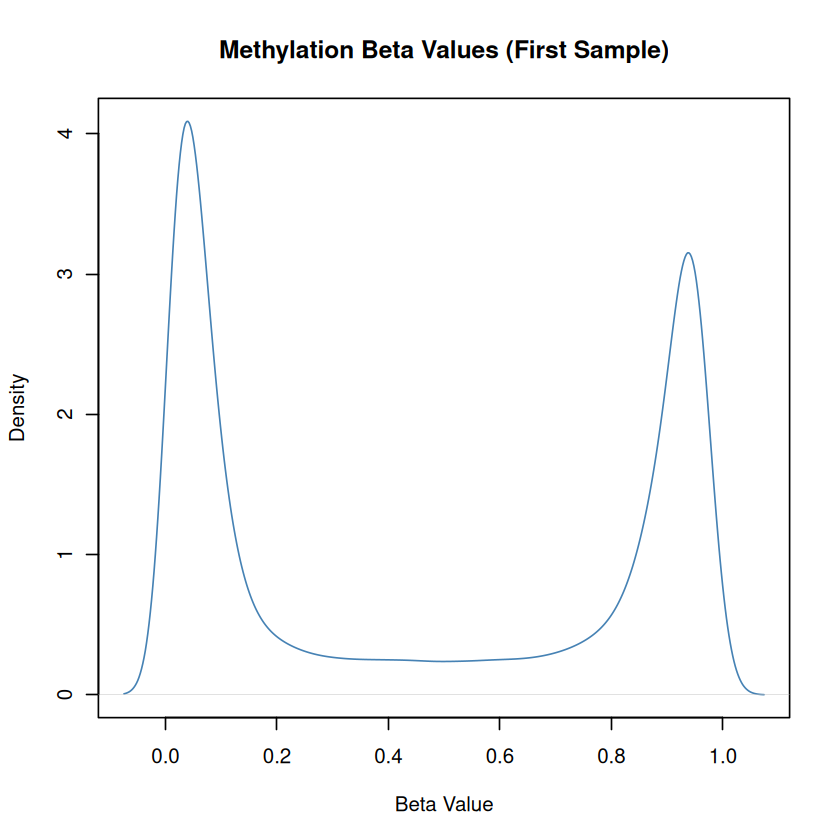

In [27]:
# ------------------ METHYLATION DATA ------------------

query_met_patient <- GDCquery(
  project = "TCGA-OV",
  data.category = "DNA Methylation",
  data.type = "Methylation Beta Value",
  platform = "Illumina Human Methylation 450",
  barcode = met_patient_barcodes
)

GDCdownload(query_met_patient)
met_data_patient <- GDCprepare(query_met_patient)

# Get beta values
beta_values <- assay(met_data_patient)
summary(beta_values[, 1])
mean(beta_values[, 1], na.rm = TRUE)

# Plot density of beta values
plot(density(beta_values[, 1], na.rm = TRUE),
     main = "Methylation Beta Values (First Sample)",
     xlab = "Beta Value", col = "steelblue")

# Top hypo/hypermethylated CpGs
top_hyper <- head(sort(beta_values[, 1], decreasing = TRUE), 10)
top_hypo  <- head(sort(beta_values[, 1], decreasing = FALSE), 10)

cat("Top Hypermethylated CpG")
head(top_hyper, 2)
cat("Top Hypomethylated CpG")
head(top_hypo, 2)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 1 files for download 1 already exist.

All samples have been already downloaded



|====================================================|100%                      Completed after 0 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      4.0   1050.2    109.2 947508.0 

[1] 1050.236

Top expressed genes

ENSG00000210082.2  ENSG00000198886.2  ENSG00000198804.2 ENSG00000156508.19 
            947508             715211             607297             599753 
ENSG00000111640.15 ENSG00000105640.13 ENSG00000089157.16 ENSG00000167658.16 
            405580             400881             275620             263573 
ENSG00000184009.12 ENSG00000167460.17 
            261462             238124

Less expressed genes

ENSG00000002586.20_PAR_Y        ENSG00000005073.6        ENSG00000006059.4 
                       0                        0                        0 
       ENSG00000006116.4       ENSG00000006659.13       ENSG00000007129.18 
                       0                        0                        0 
      ENSG00000007908.16       ENSG00000008196.13        ENSG00000008197.5 
                       0                        0                        0 
      ENSG00000009709.12 
                       0

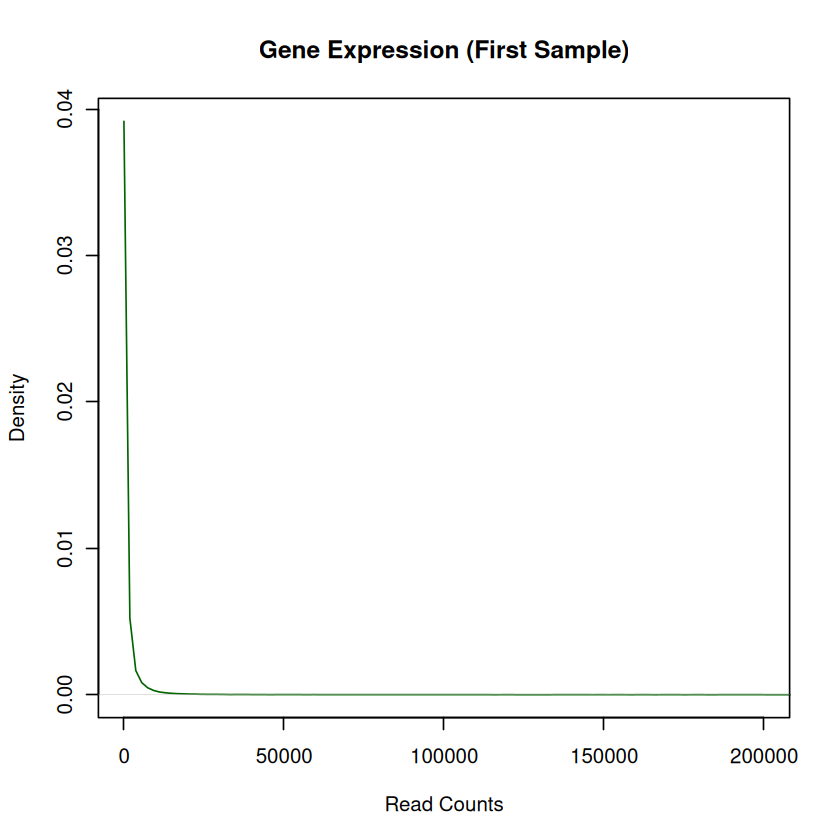

In [28]:
# ------------------ EXPRESSION DATA ------------------

query_exp_patient <- GDCquery(
  project = "TCGA-OV",
  data.category = "Transcriptome Profiling",
  data.type = "Gene Expression Quantification",
  workflow.type = "STAR - Counts",
  barcode = exp_patient_barcodes
)

GDCdownload(query_exp_patient)
exp_data_patient <- GDCprepare(query_exp_patient)

# Expression matrix
expr_matrix <- assay(exp_data_patient)
summary(expr_matrix[, 1])
mean(expr_matrix[, 1], na.rm = TRUE)

# Plot density of expression values
plot(density(expr_matrix[, 1], na.rm = TRUE),
     main = "Gene Expression (First Sample)",
     xlab = "Read Counts",
     col = "darkgreen",
     xlim = c(0, 200000))  

# Top expressed genes
cat("Top expressed genes")
head(sort(expr_matrix[, 1], decreasing = TRUE), 10)
cat("Less expressed genes")
head(sort(expr_matrix[, 1], decreasing = FALSE), 10)

In [29]:
# Preparing OV data for downstream analysis: Differential Expression Analysis
# https://bioconductor.org/packages/release/bioc/vignettes/TCGAbiolinks/inst/doc/extension.html

# TCGAbiolinks is providing a new design for the TCGAanalyze_DEA() function to perform differential expression analysis (DEA) 
# either contrasting two groups or multiple sets by providing a formula for contrast. 
# Limma pipeline was also added on top of the previously implemented one in EdgeR.

# log.trans boolean to perform log cpm transformation. Set to TRUE for log transformation
# voom boolean to voom transform data. Set to true to apply transformation
# trend boolean to perform limma-trend pipeline. Set to TRUE to go through limma-trend

# TCGAbatch_correction: Handle batch correction and lima-voom transformation
# This function calls ComBat from sva package to handle batch correction, display some plots for exploratory data analysis purposes. 
# More specifically, it shows a plot with black as a kernel estimate of the empirical batch effect density and red as the parametric.

# TCGAtumor_purity: Filter TCGA samples according to tumor purity
# Function takes TCGA barcodes as input and filter them according to values specified by user. 
# Default value for all of them is 0. Arguments are estimates using different measures imported from the TCGA consortium, 
# and they are as the following (Refer to [1]):
# D. Aran, M. Sirota, and A. J. Butte. Systematic pan-cancer analysis of tumour purity. Nat Commun, 6:8971, 2015.

# estimate uses gene expression profiles of 141 immune genes and 141 stromal genes
# absolute which uses somatic copy-number data (estimations were available for only 11 cancer types)
# lump (leukocytes unmethylation for purity), which averages 44 non-methylated immune-specific CpG sites

In [30]:
cat("Download GTEx data available through the Recount2 project: 

Recount2 project has made gene count data available for the scientific community to download. 
Recount2 is an online resource consisting of RNA-seq gene and exon counts as well as coverage bigWig files for 2041 different studies. 

It is the second generation of the ReCount project. 
The raw sequencing data were processed with Rail-RNA as described in the recount2 paper.")

Download GTEx data available through the Recount2 project: 

Recount2 project has made gene count data available for the scientific community to download. 
Recount2 is an online resource consisting of RNA-seq gene and exon counts as well as coverage bigWig files for 2041 different studies. 

It is the second generation of the ReCount project. 
The raw sequencing data were processed with Rail-RNA as described in the recount2 paper.

In [31]:
cat("Calculate stemness score with TCGAanalyze_Stemness")

Calculate stemness score with TCGAanalyze_Stemness

In [32]:
cat( "A stemness score reflects the degree to which a tumor exhibits features of stem cells — 
such as self-renewal, dedifferentiation, and high plasticity — 
which are often associated with cancer aggressiveness, poor prognosis, and therapy resistance.

These scores were originally derived using machine learning models trained on:

Expression data from pluripotent stem cells.

Methylation profiles from stem cells vs. differentiated tissues" )

A stemness score reflects the degree to which a tumor exhibits features of stem cells — 
such as self-renewal, dedifferentiation, and high plasticity — 
which are often associated with cancer aggressiveness, poor prognosis, and therapy resistance.

These scores were originally derived using machine learning models trained on:

Expression data from pluripotent stem cells.

Methylation profiles from stem cells vs. differentiated tissues

In [33]:
# stemness_scores <- TCGAanalyze_Stemness(
#  data = exp_data,
#  stemSig = "mRNAsi",   # or "mDNAsi" for methylation-based
# )

# stemness_scores <- TCGAanalyze_Stemness(
#  data = exp_data,
#  stemSig = "mDNAsi",   # or "mDNAsi" for methylation-based
# )

In [34]:
# Transcriptome Profiling
# miRNA expression

In [35]:
print("Download miRNA expression")

[1] "Download miRNA expression"


In [36]:
# Define a TCGA patient barcode (first 3 segments = patient ID)
patient_barcode <- "TCGA-WR-A838"

# Step 1: Query miRNA expression data for one patient
query.mirna <- GDCquery(
  project = "TCGA-OV", 
  experimental.strategy = "miRNA-Seq",
  data.category = "Transcriptome Profiling", 
  data.type = "miRNA Expression Quantification",
  barcode = patient_barcode
)

# Step 2: Download the data
GDCdownload(query.mirna)

# Step 3: Prepare the data
mirna_data <- GDCprepare(query.mirna)

# Step 4: Check class and view content accordingly
cat("Class of returned object:", class(mirna_data), "\n")

if ("SummarizedExperiment" %in% class(mirna_data)) {
  cat("It's a SummarizedExperiment\n")
  cat("Expression matrix (assay):\n")
  print(head(assay(mirna_data)))
  cat("Sample metadata (colData):\n")
  print(head(colData(mirna_data)))
  cat("miRNA annotations (rowData):\n")
  print(head(rowData(mirna_data)))
  
} else if ("data.frame" %in% class(mirna_data) || "tbl_df" %in% class(mirna_data)) {
  cat("It's a data.frame or tibble\n")
  cat("Here are the first few rows:\n")
  print(head(mirna_data))
  
} else {
  cat("Unknown object type. Here’s a structure preview:\n")
  str(mirna_data)
}


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By experimental.strategy

ooo By data.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 1 files for download 1 already exist.

All samples have been already downloaded



  |======================================================================| 100%
Class of returned object: spec_tbl_df tbl_df tbl data.frame 
It's a data.frame or tibble
Here are the first few rows:
# A tibble: 6 × 4
  miRNA_ID  read_count_TCGA-WR-A…¹ reads_per_million_mi…² cross-mapped_TCGA-WR…³
  <chr>                      <int>                  <dbl> <chr>                 
1 hsa-let-…                  36203                 12639. N                     
2 hsa-let-…                  36416                 12713. N                     
3 hsa-let-…                  36393                 12705. N                     
4 hsa-let-…                  45747                 15971. N                     
5 hsa-let-…                  22646                  7906. N                     
6 hsa-let-…                   3497                  1221. N                     
# ℹ abbreviated names: ¹​`read_count_TCGA-WR-A838-01A-12R-A407-13`,
#   ²​`reads_per_million_miRNA_mapped_TCGA-WR-A838-01A-12R-A407-13`,

In [37]:
print("Download Copy Number Variation")

[1] "Download Copy Number Variation"


In [38]:
# Define a TCGA patient barcode (first 3 segments = patient ID)
patient_barcode <- "TCGA-WR-A838"

# Step 1: Query CNV expression data for one patient
query.cv <- GDCquery(
  project = "TCGA-OV", 
  data.category = "Copy Number Variation",
  data.type = "Copy Number Segment",
  barcode = patient_barcode
)

# Step 2: Download the data
GDCdownload(query.cv)

# Step 3: Prepare the data
cv_data <- GDCprepare(query.cv)

# Step 4: Check class and view content accordingly
cat("Class of returned object:", class(cv_data), "\n")

if ("SummarizedExperiment" %in% class(cv_data)) {
  cat("It's a SummarizedExperiment\n")
  cat("Expression matrix (assay):\n")
  print(head(assay(cv_data)))
  cat("Sample metadata (colData):\n")
  print(head(colData(cv_data)))
  cat("miRNA annotations (rowData):\n")
  print(head(rowData(cv_data)))
  
} else if ("data.frame" %in% class(cv_data) || "tbl_df" %in% class(cv_data)) {
  cat("It's a data.frame or tibble\n")
  cat("Here are the first few rows:\n")
  print(head(cv_data))
  
} else {
  cat("Unknown object type. Here’s a structure preview:\n")
  str(cv_data)
}


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 3 files for download 3 already exist.

All samples have been already downloaded

Reading copy number variation files



Class of returned object: spec_tbl_df tbl_df tbl data.frame 
It's a data.frame or tibble
Here are the first few rows:
# A tibble: 6 × 8
  GDC_Aliquot            Chromosome  Start    End Num_Probes Segment_Mean Sample
  <chr>                  <chr>       <dbl>  <dbl>      <dbl>        <dbl> <chr> 
1 ea7c76cb-78e1-45ca-a8… 1          6.29e4 3.04e6        630       0.0185 TCGA-…
2 ea7c76cb-78e1-45ca-a8… 1          3.04e6 3.04e6          3      -1.41   TCGA-…
3 ea7c76cb-78e1-45ca-a8… 1          3.04e6 1.03e7       4536       0.0046 TCGA-…
4 ea7c76cb-78e1-45ca-a8… 1          1.03e7 1.03e7         15      -0.865  TCGA-…
5 ea7c76cb-78e1-45ca-a8… 1          1.03e7 1.20e7        865       0.0055 TCGA-…
6 ea7c76cb-78e1-45ca-a8… 1          1.20e7 1.20e7          2      -1.40   TCGA-…
# ℹ 1 more variable: GDC_Aliquot_ID <chr>


In [39]:
# https://bioconductor.org/packages/release/bioc/vignettes/TCGAbiolinks/inst/doc/download_prepare.html

In [40]:
library(TCGAbiolinks)

# Define patient barcode
patient_barcode <- "TCGA-WR-A838"

# Step 1: Query gene-level CNV data for the patient
query.cnv <- GDCquery(
  project = "TCGA-OV",
  data.category = "Copy Number Variation",
  data.type = "Gene Level Copy Number",
  access = "open",
  barcode = patient_barcode
)

# Step 2: Get results and view available files
results.cnv <- getResults(query.cnv)
print(results.cnv[, c("file_id", "cases", "analysis_workflow_type")])

# Step 3: Keep only files where 'cases' do NOT contain semicolon (i.e., single sample)
results.cnv <- results.cnv[!grepl(";", results.cnv$cases), ]

# Optional: Keep only tumor samples (e.g., ending in "01A")
results.cnv <- results.cnv[grepl("01A", results.cnv$cases), ]

# Step 4: Remove duplicate case entries
filtered_file_ids <- results.cnv[!duplicated(results.cnv$cases), "file_id"]

# Step 5: Subset the query to only include those files
query.cnv$results[[1]] <- query.cnv$results[[1]][query.cnv$results[[1]]$file_id %in% filtered_file_ids, ]

# Step 6: Download the files
GDCdownload(query.cnv)

# Step 7: Prepare the data
cnv_data <- GDCprepare(query.cnv)

# Step 8: Preview
head(cnv_data)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



                                 file_id
82  6910f2b1-b00c-423f-88c3-b582c9d8effe
235 7fcfe36b-915e-4a23-86b0-1f8ff23d4c5e
236 c8371ebd-77fe-416a-8869-89f0c7a66caf
                                                        cases
82  TCGA-WR-A838-10A-01D-A402-01;TCGA-WR-A838-01A-12D-A402-01
235                              TCGA-WR-A838-01A-12D-A402-01
236 TCGA-WR-A838-10A-01D-A402-01;TCGA-WR-A838-01A-12D-A402-01
    analysis_workflow_type
82                  ASCAT3
235      ABSOLUTE LiftOver
236                 ASCAT2



Of the 1 files for download 1 already exist.

All samples have been already downloaded

Reading Gene Level Copy Number files

Creating a SummarizedExperiment object

Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

Available assays in SummarizedExperiment : 
  => copy_number
  => min_copy_number
  => max_copy_number



class: RangedSummarizedExperiment 
dim: 6 1 
metadata(1): data_release
assays(3): copy_number min_copy_number max_copy_number
rownames(6): ENSG00000223972.5 ENSG00000227232.5 ... ENSG00000284332.1
  ENSG00000237613.2
rowData names(2): gene_id gene_name
colnames(1): TCGA-WR-A838-01A
colData names(50): barcode patient ... released sample.aux

In [41]:
print("Allele-specific Copy Number")

[1] "Allele-specific Copy Number"


In [42]:
print("Find the barcodes in the OV data")

[1] "Find the barcodes in the OV data"


In [43]:
# Define the TCGA project
project_id <- "TCGA-OV"

# Step 1: Query Allele-specific Copy Number Segment data
query <- GDCquery(
  project = project_id,
  data.category = "Copy Number Variation",
  data.type = "Allele-specific Copy Number Segment",
  access = "open"
)

# Step 2: Extract query results
results <- getResults(query)

# Step 3: Safety check — did we get results?
if (nrow(results) == 0) {
  stop("No files found for the specified project and data type.")
}

# Step 4: Print summary
cat("Files returned:\n")
# print(results[, c("file_id", "cases", "submitter_id", "analysis_workflow_type")])

# Step 5: Remove duplicated samples (by keeping one per sample barcode)
results$sample_barcode <- substr(results$cases, 1, 16)
results <- results[!duplicated(results$sample_barcode), ]

# Step 6: Filter the original query to just these non-duplicated files
query$results[[1]] <- query$results[[1]][
  query$results[[1]]$file_id %in% results$file_id,
]

# Step 7: Download filtered files
GDCdownload(query)

# Step 8: Prepare the data safely (no duplicate samples now)
data <- GDCprepare(query)

# Step 9: Preview in console
cat("Preview of allele-specific CNV data:\n")
print(head(data, 3))

# Step 10: Display interactive table
# if (inherits(data, "SummarizedExperiment")) {
#  datatable(
#    as.data.frame(assay(data)),
#    options = list(scrollX = TRUE, pageLength = 10),
#    rownames = TRUE
#  )
# } else if (is.data.frame(data)) {
#  datatable(
#    data,
#    options = list(scrollX = TRUE, pageLength = 10),
#    rownames = FALSE
#  )
# } else {
#  cat("Data is not a SummarizedExperiment or data.frame. Class is:\n")
#  print(class(data))
# }


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



Files returned:



Of the 581 files for download 581 already exist.

All samples have been already downloaded

Reading copy number variation files



Preview of allele-specific CNV data:
# A tibble: 3 × 8
  GDC_Aliquot             Chromosome  Start    End Copy_Number Major_Copy_Number
  <chr>                   <chr>       <dbl>  <dbl>       <dbl>             <dbl>
1 4d5e8e9e-46a0-4b04-ba8… chr1       6.29e4 1.08e7           3                 2
2 4d5e8e9e-46a0-4b04-ba8… chr1       1.08e7 4.73e7           4                 3
3 4d5e8e9e-46a0-4b04-ba8… chr1       4.73e7 5.78e7           6                 3
# ℹ 2 more variables: Minor_Copy_Number <dbl>, Sample <chr>


In [44]:
print("Extract CNA data for the patient TCGA-WR-A838")

[1] "Extract CNA data for the patient TCGA-WR-A838"


In [45]:
# Define TCGA patient barcode
patient_barcode <- "TCGA-WR-A838"

# Step 1: Query Allele-specific CNV data for the patient
query <- GDCquery(
  project = "TCGA-OV",
  data.category = "Copy Number Variation",
  data.type = "Allele-specific Copy Number Segment",
  access = "open",
  barcode = patient_barcode
)

# Step 2: Extract results
results <- getResults(query)

# Step 3: Check and filter duplicates (some files have tumor/normal pairs)
if (nrow(results) == 0) {
  stop("No files found for the specified patient.")
}

# Print what's available
cat("Files returned for patient:\n")
print(results[, c("file_id", "cases", "submitter_id", "analysis_workflow_type")])

# Step 4: Extract one file per sample (use first 16 characters = sample barcode)
results$sample_barcode <- substr(results$cases, 1, 16)
results <- results[!duplicated(results$sample_barcode), ]

# Step 5: Subset the original query to the selected file IDs
query$results[[1]] <- query$results[[1]][
  query$results[[1]]$file_id %in% results$file_id,
]

# Step 6: Download only the necessary files
GDCdownload(query)

# Step 7: Prepare the data (no duplication error now)
data <- GDCprepare(query)

# Step 8: Preview result
cat("Preview of allele-specific CNV data for", patient_barcode, ":\n")
print(head(data, 3))

# Step 9: Display in an interactive table
# if (inherits(data, "SummarizedExperiment")) {
#  datatable(
#    as.data.frame(assay(data)),
#    options = list(scrollX = TRUE, pageLength = 10),
#    rownames = TRUE
#  )
# } else if (is.data.frame(data)) {
#  datatable(
#    data,
#    options = list(scrollX = TRUE, pageLength = 10),
#    rownames = FALSE
#  )
# } else {
#  cat("Unexpected data format:\n")
#  print(class(data))
# }


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



Files returned for patient:
                                 file_id
154 15191296-28bb-4369-8118-d96ca42a7992
155 434f1a6d-ea17-4382-8e80-e2ce1208cd5d
                                                        cases
154 TCGA-WR-A838-10A-01D-A402-01;TCGA-WR-A838-01A-12D-A402-01
155 TCGA-WR-A838-10A-01D-A402-01;TCGA-WR-A838-01A-12D-A402-01
                                                                    submitter_id
154 TCGA-OV.19411d88-5575-4dbb-bdf2-1d0018c6a964.ascat2.allelic_specific.seg.txt
155     TCGA-WR-A838-01A-12D-A402-01_TCGA-WR-A838-10A-01D-A402-01_segment_ASCAT3
    analysis_workflow_type
154                 ASCAT2
155                 ASCAT3



Of the 1 files for download 1 already exist.

All samples have been already downloaded

Reading copy number variation files



Preview of allele-specific CNV data for TCGA-WR-A838 :
# A tibble: 3 × 8
  GDC_Aliquot             Chromosome  Start    End Copy_Number Major_Copy_Number
  <chr>                   <chr>       <dbl>  <dbl>       <dbl>             <dbl>
1 19411d88-5575-4dbb-bdf… chr1       6.29e4 7.23e7           4                 2
2 19411d88-5575-4dbb-bdf… chr1       7.23e7 7.24e7          15                 8
3 19411d88-5575-4dbb-bdf… chr1       7.24e7 1.02e8           4                 2
# ℹ 2 more variables: Minor_Copy_Number <dbl>, Sample <chr>


In [46]:
print("Extract mutation data for all OV patients")

[1] "Extract mutation data for all OV patients"


In [47]:
# Define the TCGA project
project_id <- "TCGA-OV"

# Step 1: Query mutation (MAF) data
query <- GDCquery(
  project = project_id,
  data.category = "Simple Nucleotide Variation",
  data.type = "Masked Somatic Mutation",
  workflow.type = "Aliquot Ensemble Somatic Variant Merging and Masking",
  access = "open"
)

# Step 2: Extract query results
results <- getResults(query)

# Step 3: Check what columns are available
cat("Columns in results:\n")
print(names(results))

# Step 4: Preview available data
cat("Mutation file preview:\n")
print(head(results))

# Step 5: Remove duplicated samples using the correct column
# Usually 'cases' or 'case_submitter_id' or 'submitter_id' contains the barcode
if ("cases" %in% names(results)) {
  results$sample_barcode <- substr(results$cases, 1, 16)
} else if ("case_submitter_id" %in% names(results)) {
  results$sample_barcode <- substr(results$case_submitter_id, 1, 16)
} else {
  stop("Could not find a barcode column to deduplicate samples.")
}

results <- results[!duplicated(results$sample_barcode), ]

# Step 6: Filter the original query object
query$results[[1]] <- query$results[[1]][
  query$results[[1]]$file_id %in% results$file_id,
]

# Step 7: Download the data
GDCdownload(query)

# Step 8: Prepare the data (MAF)
mutation_data <- GDCprepare(query)

# Step 9: Display preview
cat("Preview of mutation data:\n")
print(head(mutation_data, 3))

# Step 10: Display interactive table
# if (is.data.frame(mutation_data)) {
#  datatable(
#    mutation_data,
#    options = list(scrollX = TRUE, pageLength = 10),
#    rownames = FALSE
#  )
# } else {
#  cat("Mutation data is not a data.frame. Class:\n")
#  print(class(mutation_data))
# }


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

ooo By workflow.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



Columns in results:
 [1] "id"                        "data_format"              
 [3] "cases"                     "access"                   
 [5] "file_name"                 "submitter_id"             
 [7] "data_category"             "type"                     
 [9] "platform"                  "file_size"                
[11] "created_datetime"          "md5sum"                   
[13] "updated_datetime"          "file_id"                  
[15] "data_type"                 "state"                    
[17] "experimental_strategy"     "version"                  
[19] "data_release"              "project"                  
[21] "analysis_id"               "analysis_state"           
[23] "analysis_submitter_id"     "analysis_workflow_link"   
[25] "analysis_workflow_type"    "analysis_workflow_version"
[27] "sample_type"              
Mutation file preview:
                                    id data_format
1 e2867937-1c7a-40f9-bb88-131ec4a92a07         MAF
2 896dbb9b-ae00-4ba3-a3c0-40e


Of the 419 files for download 419 already exist.

All samples have been already downloaded



Preview of mutation data:
# A tibble: 3 × 140
  Hugo_Symbol Entrez_Gene_Id Center NCBI_Build Chromosome Start_Position
  <chr>                <int> <chr>  <chr>      <chr>               <int>
1 MAST2                23139 WUGSC  GRCh38     chr1             46035942
2 C8B                    732 WUGSC  GRCh38     chr1             56929415
3 IKBKE                 9641 WUGSC  GRCh38     chr1            206493296
# ℹ 134 more variables: End_Position <int>, Strand <chr>,
#   Variant_Classification <chr>, Variant_Type <chr>, Reference_Allele <chr>,
#   Tumor_Seq_Allele1 <chr>, Tumor_Seq_Allele2 <chr>, dbSNP_RS <chr>,
#   dbSNP_Val_Status <lgl>, Tumor_Sample_Barcode <chr>,
#   Matched_Norm_Sample_Barcode <chr>, Match_Norm_Seq_Allele1 <lgl>,
#   Match_Norm_Seq_Allele2 <lgl>, Tumor_Validation_Allele1 <lgl>,
#   Tumor_Validation_Allele2 <lgl>, Match_Norm_Validation_Allele1 <lgl>, …


In [48]:
# Define the TCGA project and patient barcode
patient_barcode <- "TCGA-WR-A838"

# Step 1: Query mutation (MAF) data for a specific patient
query <- GDCquery(
  project = "TCGA-OV",
  data.category = "Simple Nucleotide Variation",
  data.type = "Masked Somatic Mutation",
  workflow.type = "Aliquot Ensemble Somatic Variant Merging and Masking",
  barcode = patient_barcode,
  access = "open"
)

# Step 2: Extract query results
results <- getResults(query)

# Step 3: Check what columns are available
cat("Columns in results:\n")
print(names(results))

# Step 4: Preview available data
cat("Mutation file preview:\n")
print(head(results))

# (Optional) Step 5: Print matched barcodes
if ("cases" %in% names(results)) {
  results$sample_barcode <- substr(results$cases, 1, 16)
  print(unique(results$sample_barcode))
}

# Step 6: Filter the query to valid file_ids (just a safety step)
query$results[[1]] <- query$results[[1]][
  query$results[[1]]$file_id %in% results$file_id,
]

# Step 7: Download the data (skips if already downloaded)
GDCdownload(query)

# Step 8: Prepare the mutation (MAF) data
mutation_data <- GDCprepare(query)

# Step 9: Show preview
cat("Preview of mutation data:\n")
print(head(mutation_data, 3))

# Step 10: Display in interactive DT table
# if (is.data.frame(mutation_data)) {
#  datatable(
#    mutation_data,
#    options = list(scrollX = TRUE, pageLength = 10),
#    rownames = FALSE
#  )
# } else {
#  cat("Mutation data is not a data.frame. Class:\n")
#  print(class(mutation_data))
# }

# Only first 50 to make render faster
# datatable(mutation_data[1:10,],
#          filter = 'top',
#          options = list(scrollX = TRUE, keys = TRUE, pageLength = 5), 
#          rownames = FALSE)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

ooo By workflow.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



Columns in results:
 [1] "id"                        "data_format"              
 [3] "cases"                     "access"                   
 [5] "file_name"                 "submitter_id"             
 [7] "data_category"             "type"                     
 [9] "platform"                  "file_size"                
[11] "created_datetime"          "md5sum"                   
[13] "updated_datetime"          "file_id"                  
[15] "data_type"                 "state"                    
[17] "experimental_strategy"     "version"                  
[19] "data_release"              "project"                  
[21] "analysis_id"               "analysis_state"           
[23] "analysis_submitter_id"     "analysis_workflow_link"   
[25] "analysis_workflow_type"    "analysis_workflow_version"
[27] "sample_type"              
Mutation file preview:
                                     id data_format
22 dcf8ca3c-42a6-420d-a607-7957efb1668e         MAF
                           


Of the 1 files for download 1 already exist.

All samples have been already downloaded



Preview of mutation data:
# A tibble: 3 × 140
  Hugo_Symbol Entrez_Gene_Id Center NCBI_Build Chromosome Start_Position
  <chr>                <int> <chr>  <chr>      <chr>               <int>
1 SLC6A17             388662 WUGSC  GRCh38     chr1            110174934
2 ABI2                 10152 WUGSC  GRCh38     chr2            203427208
3 MAP2                  4133 WUGSC  GRCh38     chr2            209696708
# ℹ 134 more variables: End_Position <int>, Strand <chr>,
#   Variant_Classification <chr>, Variant_Type <chr>, Reference_Allele <chr>,
#   Tumor_Seq_Allele1 <chr>, Tumor_Seq_Allele2 <chr>, dbSNP_RS <chr>,
#   dbSNP_Val_Status <lgl>, Tumor_Sample_Barcode <chr>,
#   Matched_Norm_Sample_Barcode <chr>, Match_Norm_Seq_Allele1 <lgl>,
#   Match_Norm_Seq_Allele2 <lgl>, Tumor_Validation_Allele1 <lgl>,
#   Tumor_Validation_Allele2 <lgl>, Match_Norm_Validation_Allele1 <lgl>, …


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

ooo By workflow.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 482 files for download 482 already exist.

All samples have been already downloaded



-Validating
-Silent variants: 9351 
-Summarizing
--Mutiple centers found
WUGSC;BI;BI;WUGSC--Possible FLAGS among top ten genes:
  TTN
  USH2A
  MUC16
  HMCN1
  FLG
-Processing clinical data
--Missing clinical data
-Finished in 2.328s elapsed (2.350s cpu) 


Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Nonstop_Mutation,Splice_Site,Translation_Start_Site,total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
TCGA-59-2349-01A-01W-0799-08,54,10,5,0,566,43,0,6,0,684
TCGA-61-1734-01B-01W-0722-08,2,301,0,0,38,4,0,6,0,351
TCGA-23-1121-01A-01W-0486-08,9,3,2,0,199,17,0,12,0,242
TCGA-13-0920-01A-01W-0421-09,12,1,4,0,190,11,0,8,0,226
TCGA-13-0920-01A-01W-0420-08,8,1,5,0,183,13,0,7,0,217
TCGA-24-1469-01A-01W-0553-09,2,2,1,0,183,3,0,0,0,191
TCGA-13-1481-01A-01W-0549-09,6,1,2,0,158,12,0,7,0,186
TCGA-23-1022-01A-02W-0486-08,7,4,2,0,157,6,0,2,0,178
TCGA-29-1691-01A-01W-0633-09,6,1,2,0,150,5,0,9,0,173


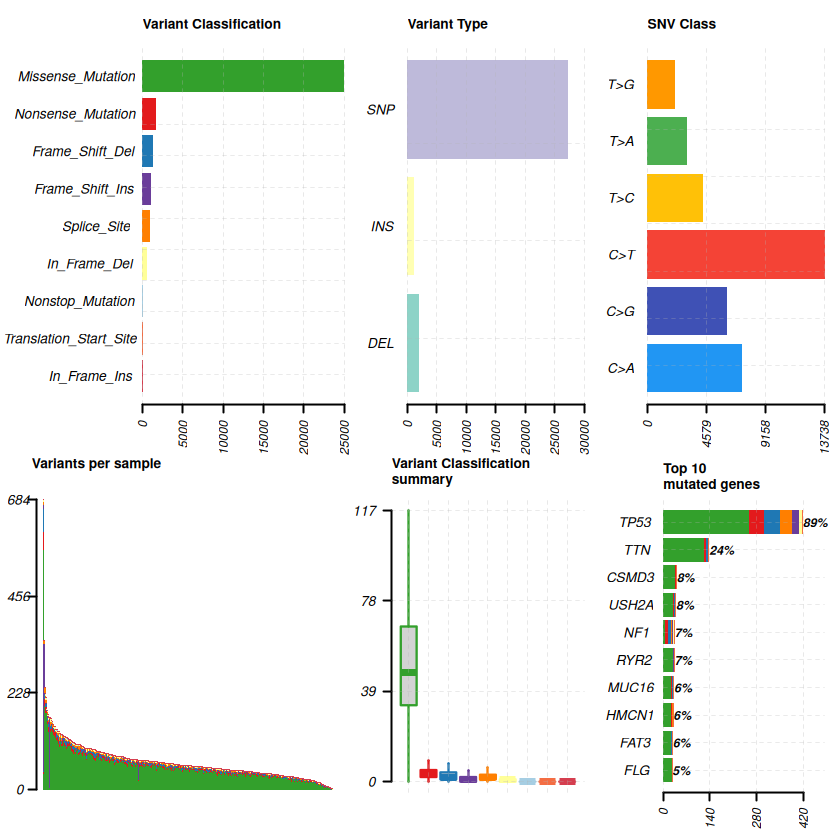

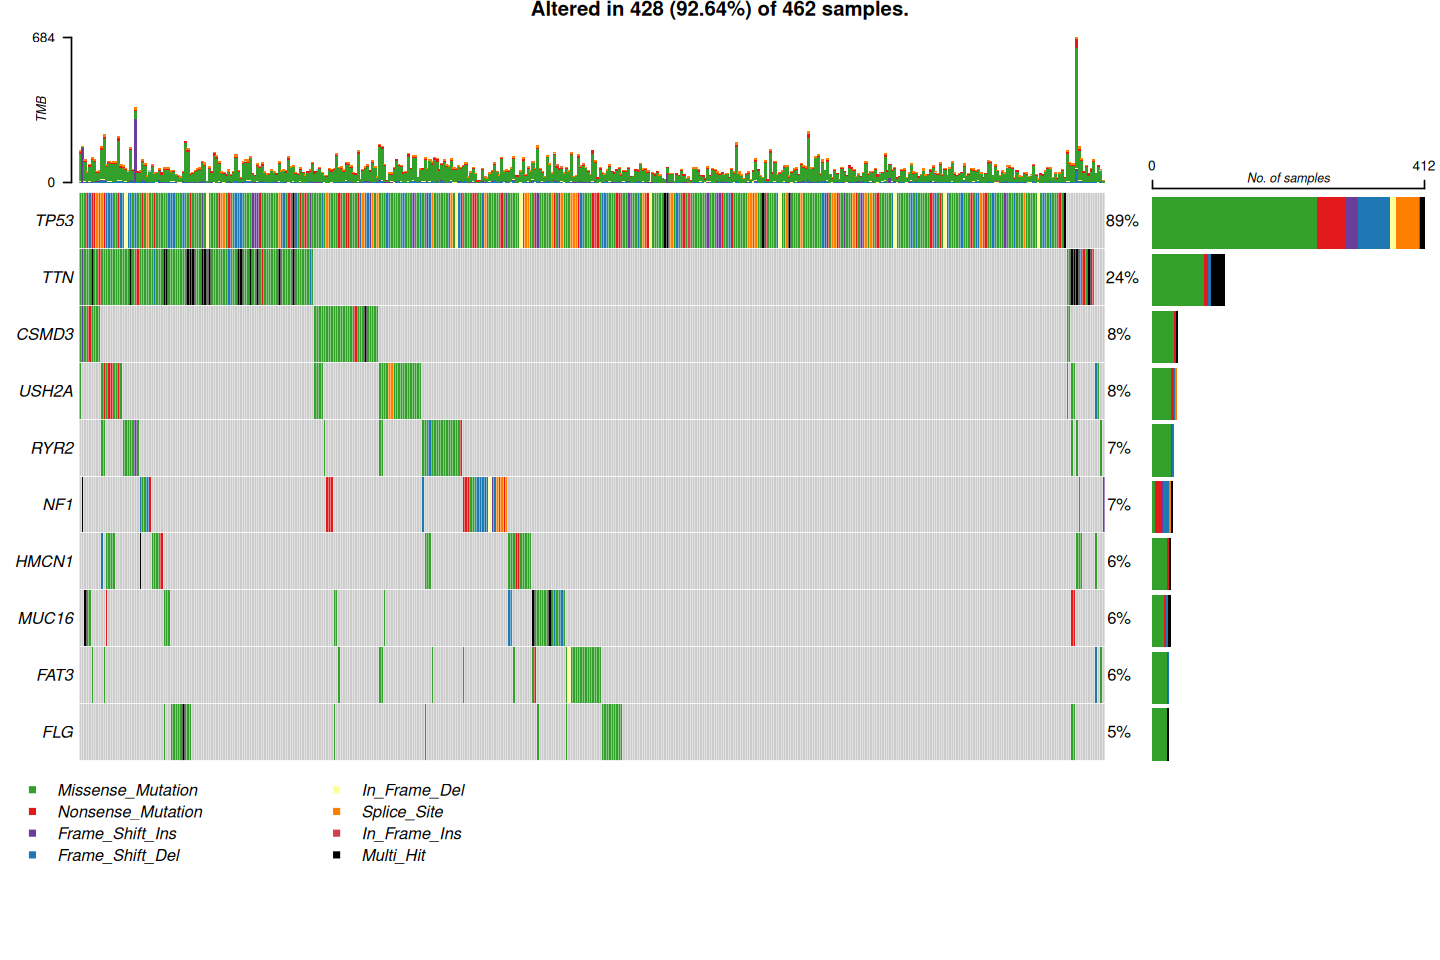

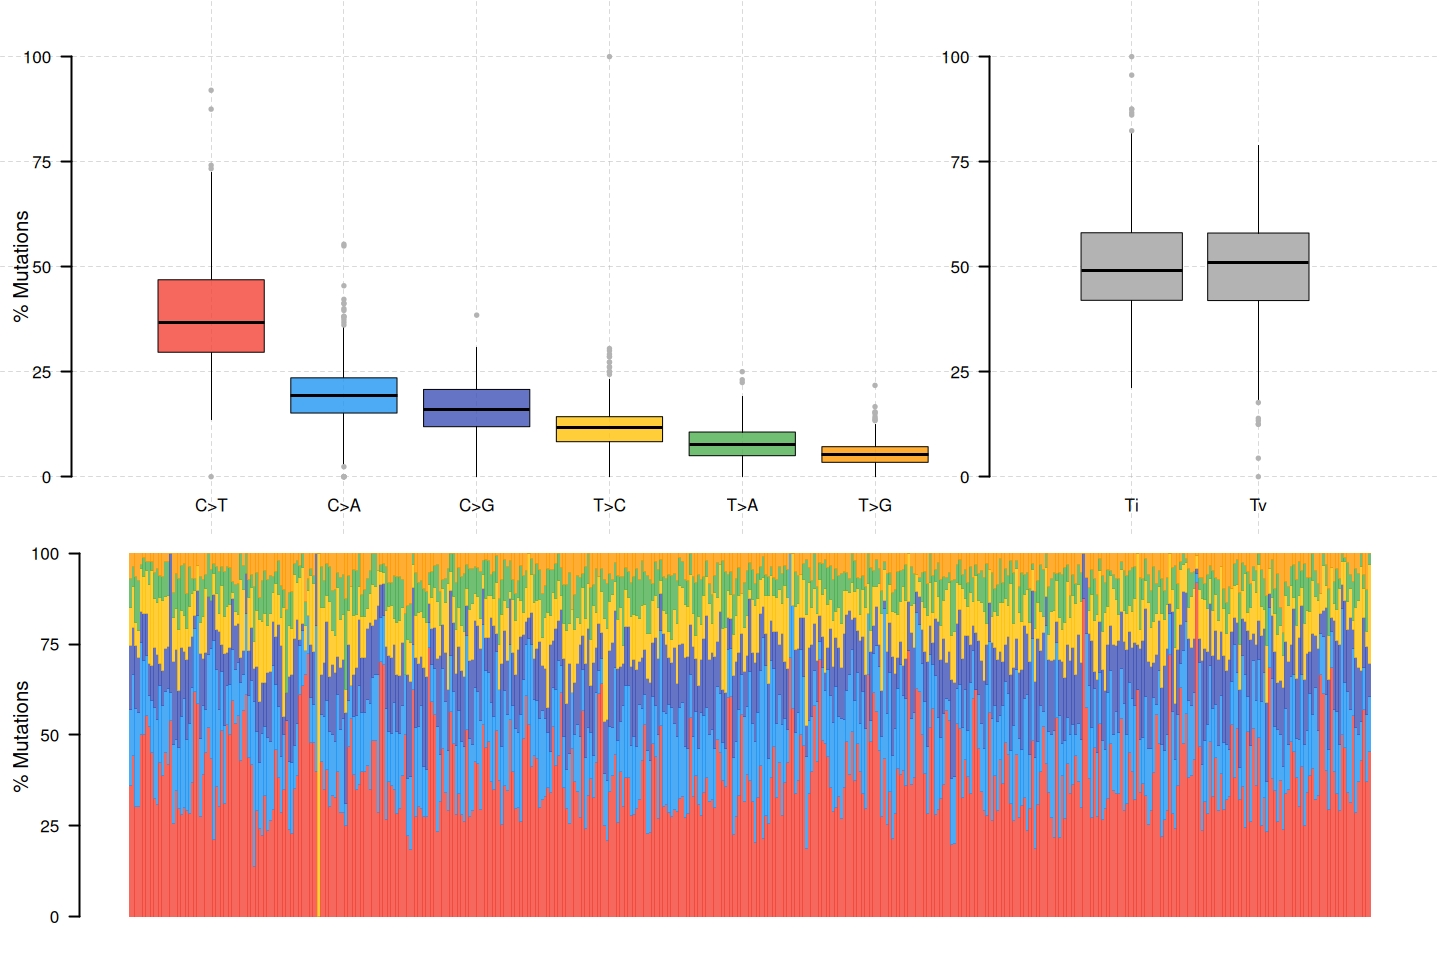

In [49]:
# Load required libraries

library(maftools)

# Step 1: Query mutation data using the correct workflow type
query <- GDCquery(
  project = "TCGA-OV",
  data.category = "Simple Nucleotide Variation",
  data.type = "Masked Somatic Mutation",
  workflow.type = "Aliquot Ensemble Somatic Variant Merging and Masking",
  access = "open"
)

# Step 2: Download the data
GDCdownload(query)

# Step 3: Prepare the data as a data.frame (likely a tibble)
maf_df <- GDCprepare(query)

# Step 4: Convert to a maftools MAF object
maf_object <- read.maf(maf = as.data.frame(maf_df))

# Step 5: Get a summary
getSampleSummary(maf_object)

# Optional: Visualize MAF stats
plotmafSummary(maf = maf_object)

# Set plot height for Jupyter output (adjust this as needed)
options(repr.plot.width = 12, repr.plot.height = 8)

# Oncoplot for top 10 mutated genes
oncoplot(maf = maf_object, top = 10, removeNonMutated = TRUE)

# Transitions and transversions
titv_result <- titv(maf = maf_object, plot = FALSE, useSyn = TRUE)

# Plot TiTv summary
plotTiTv(res = titv_result)

# plot <- mafSurvival(
#  maf = maf_object,
#  genes = "TP53",
#  time = 'time',
#  Status = 'Overall_Survival_Status',
#  isTCGA = TRUE
# )

#  maf,
#  genes = NULL,
#  samples = NULL,
#  clinicalData = NULL,
#  time = "Time",

In [50]:
# survdiff performs a log-rank test (which compares survival curves), it doesn't explicitly fit a Cox proportional hazards model. 
# If you wanted to assess hazard ratios and adjust for covariates, you would use the coxph() function from the survival package.

In [51]:
# Other functions :
# https://bioconductor.org/packages/release/bioc/vignettes/TCGAbiolinks/inst/doc/analysis.html

# TCGAanalyze: Analyze data from TCGA.
# TCGAanalyze_Preprocessing: Preprocessing of Gene Expression data (IlluminaHiSeq_RNASeqV2)

# TCGAanalyze_DEA & TCGAanalyze_LevelTab: Differential expression analysis (DEA)
# TCGAanalyze_EAcomplete & TCGAvisualize_EAbarplot: Enrichment Analysis

# TCGAanalyze_survival: Survival Analysis
# TCGAanalyze_SurvivalKM: Correlating gene expression and Survival Analysis
# TCGAanalyze_DMR: Differentially methylated regions Analysis

# TCGAvisualize_Heatmap: Create heatmaps with cluster bars
# TCGAvisualize_Volcano: Create volcano plot
# TCGAvisualize_PCA: Principal Component Analysis plot for differentially expressed genes
# TCGAvisualize_meanMethylation: Mean DNA Methylation Analysis

# TCGAvisualize_starburst: Integration of gene expression and DNA methylation data